## Using pretrained neurel audio codec encoder-decoder

In [42]:
from encodec import EncodecModel
from encodec.utils import convert_audio

import IPython
import torchaudio
import torch
import matplotlib.pyplot as plt

In [111]:

path = "samples/test.wav"
# Instantiate a pretrained EnCodec model
model = EncodecModel.encodec_model_24khz()
model.set_target_bandwidth(6.0)

# Load and pre-process the audio waveform
wav, sr = torchaudio.load(path)
wav = convert_audio(wav, sr, model.sample_rate, model.channels)
wav = wav.unsqueeze(0)

# Extract discrete codes from EnCodec
with torch.no_grad():
    encoded_frames = model.encode(wav)
codes = torch.cat([encoded[0] for encoded in encoded_frames], dim=-1)  # [B, n_q, T]

print(codes.shape)

torch.Size([1, 8, 99])


In [112]:
with torch.no_grad():
    reconstruction = model.decode([(codes, None)])[0]


size of original signal: torch.Size([1, 31647])
size of reconstruction: torch.Size([1, 31680])
MSE loss between them: 3.8912417949177325e-05


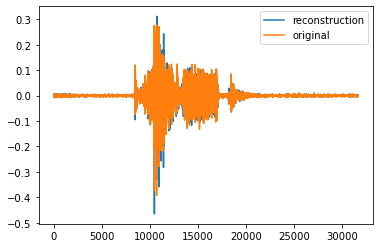

In [113]:
signal = wav[0]
def test_reconstruction(r):
    plt.plot(r[0])
    plt.plot(signal[0])
    plt.legend(['reconstruction', 'original'])
    min_length = min(signal.shape[0], r.shape[0])
    print(f'size of original signal: {signal.shape}\nsize of reconstruction: {r.shape}\nMSE loss between them: {torch.nn.MSELoss()(signal[:,0:min_length], r[:,0:min_length])}')

test_reconstruction(reconstruction)
IPython.display.Audio(reconstruction[0], rate = model.sample_rate)